DBの初期化が完了しました。


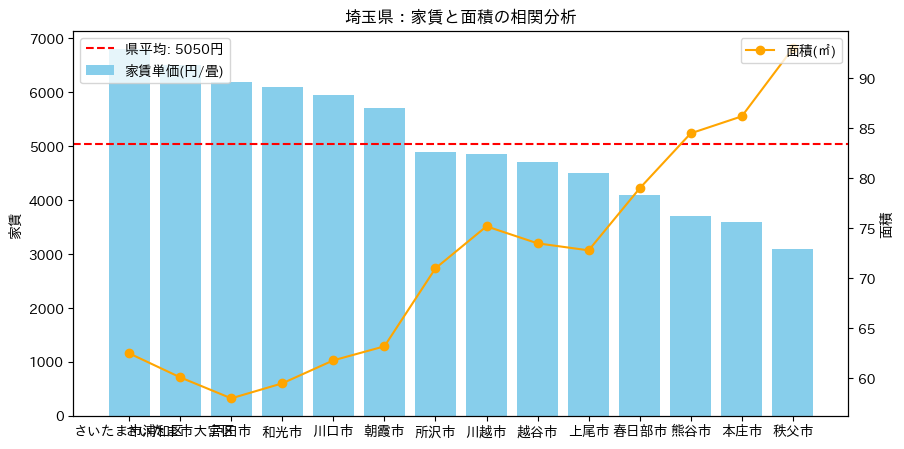

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 1. データベースとテーブルがなければ作成する処理
def initialize_db():
    conn = sqlite3.connect('saitama_housing_final.db')
    cursor = conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS housing_stats')
    cursor.execute('CREATE TABLE housing_stats (id INTEGER PRIMARY KEY, city_name TEXT, avg_rent REAL, avg_area REAL)')
    
    # データを挿入
    data = [
        ('さいたま市浦和区', 6800, 62.5), ('さいたま市大宮区', 6500, 60.1),
        ('戸田市', 6200, 58.0), ('和光市', 6100, 59.5), ('川口市', 5950, 61.8),
        ('朝霞市', 5700, 63.2), ('所沢市', 4900, 71.0), ('川越市', 4850, 75.2),
        ('越谷市', 4700, 73.5), ('上尾市', 4500, 72.8), ('春日部市', 4100, 79.0),
        ('熊谷市', 3700, 84.5), ('本庄市', 3600, 86.2), ('秩父市', 3100, 93.0)
    ]
    cursor.executemany('INSERT INTO housing_stats (city_name, avg_rent, avg_area) VALUES (?, ?, ?)', data)
    conn.commit()
    conn.close()
    print("DBの初期化が完了しました。")

# DBを初期化
initialize_db()

# 2. クエリを発行して可視化（ここからはエラーが出たコードと同じ）
conn = sqlite3.connect('saitama_housing_final.db')
query = "SELECT city_name, avg_rent, avg_area FROM housing_stats ORDER BY avg_rent DESC"
df = pd.read_sql(query, conn)
avg_rent = df['avg_rent'].mean()
conn.close()

# 可視化
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(df['city_name'], df['avg_rent'], color='skyblue', label='家賃単価(円/畳)')
ax1.axhline(avg_rent, color='red', linestyle='--', label=f'県平均: {avg_rent:.0f}円')
ax1.set_ylabel('家賃')
ax2 = ax1.twinx()
ax2.plot(df['city_name'], df['avg_area'], color='orange', marker='o', label='面積(㎡)')
ax2.set_ylabel('面積')
plt.title('埼玉県：家賃と面積の相関分析')
ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
plt.show()